### Citibike Analysis

In [ ]:
import os
from dotenv import load_dotenv

from google.cloud import bigquery

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
load_dotenv()

True

In [3]:
client = bigquery.Client()

bq_project_id = os.getenv('GCP_PROJECT_ID')
bq_dataset_name = os.getenv('BQ_DATASET')
bq_table_name = os.getenv('BQ_TABLE')

table_red = f'{bq_project_id}.{bq_dataset_name}.{bq_table_name}'
cleaned_table_ref = f'{bq_project_id}.{bq_dataset_name}.{bq_table_name}_cleaned'

In [5]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,29B167D55DA816D0,classic_bike,2025-01-23 07:53:07.936000+00:00,2025-01-23 07:55:05.935000+00:00,67 St & Erik Pl,2733.03,5 Ave & 67 St,2782.02,40.633385,-74.016562,40.635679,-74.020005,member,None,None
1,86CF142F4EAF9128,classic_bike,2025-01-26 07:43:56.280000+00:00,2025-01-26 07:45:39.826000+00:00,67 St & Erik Pl,2733.03,5 Ave & 67 St,2782.02,40.633385,-74.016562,40.635679,-74.020005,member,None,None
2,7135F4F5DDBCB628,classic_bike,2025-01-28 16:15:19.573000+00:00,2025-01-28 16:34:58.434000+00:00,67 St & Erik Pl,2733.03,21 St & 4 Ave,3668.04,40.633385,-74.016562,40.662584,-73.995554,member,None,None
3,5FA3747FA7463A94,classic_bike,2025-01-05 11:40:42.639000+00:00,2025-01-05 11:45:31.807000+00:00,5 Ave & 67 St,2782.02,7 Ave & 62 St,2821.05,40.635679,-74.020005,40.635560,-74.012980,member,None,None
4,DD340554B831BB57,classic_bike,2025-01-14 08:53:24.040000+00:00,2025-01-14 08:58:17.076000+00:00,5 Ave & 67 St,2782.02,7 Ave & 62 St,2821.05,40.635679,-74.020005,40.635560,-74.012980,member,None,None


In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'cleaned_start_station_id',
       'cleaned_start_station_name'],
      dtype='object')

In [7]:
df.dtypes

ride_id                                    object
rideable_type                              object
started_at                    datetime64[us, UTC]
ended_at                      datetime64[us, UTC]
start_station_name                         object
start_station_id                           object
end_station_name                           object
end_station_id                             object
start_lat                                 float64
start_lng                                 float64
end_lat                                   float64
end_lng                                   float64
member_casual                              object
cleaned_start_station_id                   object
cleaned_start_station_name                 object
dtype: object

In [8]:
query = f"""
    SELECT 
        COUNT(*) - COUNT(ride_id) as ride_id_null,
        COUNT(*) - COUNT(rideable_type) as rideable_type_null,
        COUNT(*) - COUNT(started_at) as started_at_null,
        COUNT(*) - COUNT(ended_at) as ended_at_null,
        COUNT(*) - COUNT(start_station_name) as start_station_name_null,
        COUNT(*) - COUNT(start_station_id) as start_station_idnull,
        COUNT(*) - COUNT(end_station_name) as end_station_name_null,
        COUNT(*) - COUNT(end_station_id) as end_station_id_null,
        COUNT(*) - COUNT(start_lat) as start_lat_null,
        COUNT(*) - COUNT(start_lng) as start_lng_null,
        COUNT(*) - COUNT(end_lat) as end_lat_null,
        COUNT(*) - COUNT(end_lng) as end_lng_null,
        COUNT(*) - COUNT(member_casual) as member_casual_null
    FROM `{bq_dataset_name}.{bq_table_name}`
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id_null,rideable_type_null,started_at_null,ended_at_null,start_station_name_null,start_station_idnull,end_station_name_null,end_station_id_null,start_lat_null,start_lng_null,end_lat_null,end_lng_null,member_casual_null
0,0,0,0,0,35253,0,152745,0,0,0,12784,12784,0


In [9]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE start_station_name IS NULL
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,16A4ED1505A13D3F,electric_bike,2024-11-14 17:08:17.899000+00:00,2024-11-14 17:25:05.339000+00:00,None,nan,Cortelyou Rd & Argyle Rd,2984.04,40.65,-74.00,40.640340,-73.966030,casual,None,None
1,22C85C606F5AB7D9,electric_bike,2024-11-22 15:32:45.958000+00:00,2024-11-22 16:38:04.567000+00:00,None,nan,6 Ave & 55 St,3000.08,40.65,-74.00,40.640831,-74.010996,casual,None,None
2,45EA3047CCF80C62,electric_bike,2024-11-01 15:34:43.628000+00:00,2024-11-01 15:37:25.117000+00:00,None,nan,52 St & 1 Ave,3253.01,40.64,-74.01,40.649292,-74.020105,casual,None,None
3,53B34B319E2D816E,electric_bike,2024-11-14 17:11:04.328000+00:00,2024-11-14 17:42:04.710000+00:00,None,nan,Rutland Rd & E 45 St,3567.05,40.71,-73.99,40.660340,-73.936180,casual,None,None
4,276E868605E242F1,electric_bike,2024-11-18 15:18:59.364000+00:00,2024-11-18 16:00:02.779000+00:00,None,nan,Maple St & Albany Ave,3608.06,40.66,-73.94,40.661550,-73.939740,casual,None,None


In [10]:
query = f"""
    SELECT *
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE end_station_name IS NULL
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name
0,CBCD3C72559F2B35,classic_bike,2024-10-31 20:44:44.600000+00:00,2024-11-01 21:44:40.324000+00:00,Cortelyou Rd & Stratford Rd,2898.01,None,nan,40.639660,-73.968070,NaN,NaN,casual,None,None
1,96FBB4087820A30D,classic_bike,2024-10-01 21:40:32.149000+00:00,2024-10-02 22:40:27.657000+00:00,Cortelyou Rd & Argyle Rd,2984.04,None,nan,40.640340,-73.966030,NaN,NaN,casual,None,None
2,0F53580F22942FDD,classic_bike,2024-10-19 23:10:16.652000+00:00,2024-10-21 00:10:12.738000+00:00,Cortelyou Rd & E 19 St,3022.01,None,nan,40.642690,-73.960990,NaN,NaN,casual,None,None
3,99F43D2EEB247081,classic_bike,2024-10-07 08:48:29.391000+00:00,2024-10-08 09:48:26.494000+00:00,12 Ave & 36 St,3056.05,None,nan,40.643546,-73.986418,NaN,NaN,casual,None,None
4,FDDFF503BA08BEAF,classic_bike,2024-10-15 16:42:28.311000+00:00,2024-10-16 17:42:22.984000+00:00,Beverley Rd & Flatbush Ave,3180.02,None,nan,40.644990,-73.958180,NaN,NaN,casual,None,None


In [11]:
query = f"""
    SELECT COUNT(*) as cnt
    FROM `{bq_dataset_name}.{bq_table_name}`
    WHERE start_station_id = 'nan' OR end_station_id = 'nan'
"""

nan_cnt = client.query(query).to_dataframe()['cnt'][0]
nan_cnt

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


np.int64(182206)

In [12]:
query = f"""
    CREATE OR REPLACE TABLE {cleaned_table_ref}
    PARTITION BY DATE_TRUNC(started_at, MONTH)
    CLUSTER BY member_casual, rideable_type 
        AS
            SELECT * FROM `{bq_dataset_name}.{bq_table_name}`
            WHERE start_station_id != 'nan' AND end_station_id != 'nan'
"""

job = client.query(query)
job.result()


In [13]:
query = f"""
    SELECT COUNT(*) as cnt
    FROM {cleaned_table_ref}
    WHERE start_station_id = 'nan' OR end_station_id = 'nan'
"""

nan_cnt = client.query(query).to_dataframe()['cnt'][0]
nan_cnt

np.int64(0)

In [ ]:
query = f"""
    SELECT *
    FROM {cleaned_table_ref}
    WHERE TIMESTAMP_DIFF(ended_at, started_at, MINUTE) <= 0
    LIMIT 5
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,cleaned_start_station_id,cleaned_start_station_name


In [105]:
query = f"""
 SELECT
  COUNT(*) AS total_trips,
  AVG(TIMESTAMP_DIFF(ended_at, started_at, MINUTE)) AS avg_ride_time,
  -- approximate median as 50th percentile
  APPROX_QUANTILES(TIMESTAMP_DIFF(ended_at, started_at, MINUTE), 100)[OFFSET(50)] AS median_ride_time,
  COUNTIF(TIMESTAMP_DIFF(ended_at, started_at, MINUTE) > 45) AS trips_over_45_min,
  COUNTIF(TIMESTAMP_DIFF(ended_at, started_at, MINUTE) > 120) AS trips_over_2_hours,
  ROUND(100 * COUNTIF(TIMESTAMP_DIFF(ended_at, started_at, MINUTE) > 45) / COUNT(*), 2) AS pct_over_45_min,
  ROUND(100 * COUNTIF(TIMESTAMP_DIFF(ended_at, started_at, MINUTE) > 120) / COUNT(*), 2) AS pct_over_2_hours
FROM
  {cleaned_table_ref}
WHERE
  ended_at IS NOT NULL
  AND started_at IS NOT NULL
"""

df =  client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,total_trips,avg_ride_time,median_ride_time,trips_over_45_min,trips_over_2_hours,pct_over_45_min,pct_over_2_hours
0,59483258,12.045067,8,1127097,101822,1.89,0.17


In [177]:
query = f"""
    DELETE
    FROM {cleaned_table_ref}
    WHERE 
        TIMESTAMP_DIFF(ended_at, started_at, MINUTE) < 2 
    OR 
        TIMESTAMP_DIFF(ended_at, started_at, MINUTE) > 120
"""

job = client.query(query)
job.result()

In [14]:
query = f"""
    SELECT start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_id;
"""

df = client.query(query).to_dataframe()
df

,start_station_id,f0_
0,JC104,4
1,HB602,6
2,JC018,1
3,JC102,1
4,JC080,4
...,...,...
72,HB202,3
73,JC098,1
74,JC105,4
75,JC022,2


In [15]:
regex = r'^[A-Za-z]{2}\d{3}$'

query = f"""
    DELETE 
    FROM {cleaned_table_ref}
    WHERE REGEXP_CONTAINS(start_station_id, r'{regex}') OR REGEXP_CONTAINS(end_station_id, r'{regex}')
"""

job = client.query(query)
job.result()

In [16]:
query = f"""
    SELECT start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_id,f0_
0,6247.06_Pillar,70
1,LA Metro Demo 2,12
2,SYS038,1219
3,Lab - NYC,6
4,5308.04_,44
5,LA Metro Demo 1,4
6,190 Morgan,5
7,Shop Morgan,1023
8,Lab - NYC - Monolith,8
9,SYS033,156


In [17]:
regex_patterns = [
    r'^SYS\d{3}$',          # SYS + 3 digits
    r'(?i)Demo',            # Contains "Demo"
    r'(?i)Lab - NYC',       # Contains "Lab - NYC"
    r'(?i)Morgan'           # Contains "Morgan"
]

combined_pattern = '|'.join(regex_patterns)

query = f"""
    DELETE FROM {cleaned_table_ref}
    WHERE REGEXP_CONTAINS(start_station_id, r'{combined_pattern}') OR REGEXP_CONTAINS(end_station_id, r'{combined_pattern}')
"""

job = client.query(query)
job.result()

In [18]:
regex = r'^\d+\.\d+_$'

query = f"""
    UPDATE {cleaned_table_ref}
    SET 
        start_station_id = CASE 
            WHEN REGEXP_CONTAINS(start_station_id, r'{regex}') THEN REPLACE(start_station_id, '_', '')
            ELSE start_station_id
        END,
        end_station_id = CASE 
            WHEN REGEXP_CONTAINS(end_station_id, r'{regex}') THEN REPLACE(end_station_id, '_', '')
            ELSE end_station_id
        END
    WHERE 
        REGEXP_CONTAINS(start_station_id, r'{regex}') OR
        REGEXP_CONTAINS(end_station_id, r'{regex}')
"""

job = client.query(query)
job.result()

In [19]:
regex_id = r'_Pillar$'
regex_name = r'(?i)\s*Pillar\s*'

query = f"""
    UPDATE {cleaned_table_ref}
    SET 
        start_station_id = CASE 
            WHEN REGEXP_CONTAINS(start_station_id, r'Pillar') THEN REGEXP_REPLACE(start_station_id, r'{regex_id}', '') 
            ELSE start_station_id END,
        start_station_name = CASE 
            WHEN REGEXP_CONTAINS(start_station_name, r'Pillar') THEN TRIM(REGEXP_REPLACE(start_station_name, r'{regex_name}', ' ')) 
            ELSE start_station_name END,
        end_station_id = CASE 
            WHEN REGEXP_CONTAINS(end_station_id, r'Pillar') THEN REGEXP_REPLACE(end_station_id, r'{regex_id}', '') 
            ELSE end_station_id END,
        end_station_name = CASE 
            WHEN REGEXP_CONTAINS(end_station_name, r'Pillar') THEN TRIM(REGEXP_REPLACE(end_station_name, r'{regex_name}', ' ')) 
            ELSE end_station_name END
        WHERE 
            REGEXP_CONTAINS(start_station_id, r'Pillar') OR
            REGEXP_CONTAINS(start_station_name, r'Pillar') OR
            REGEXP_CONTAINS(end_station_id, r'Pillar') OR
            REGEXP_CONTAINS(end_station_name, r'Pillar')
"""

job = client.query(query)
job.result()


In [20]:
query = f"""
    SELECT start_station_name, start_station_id, COUNT(*)
    FROM `{cleaned_table_ref}`
    WHERE start_station_id IS NULL OR SAFE_CAST(start_station_id AS FLOAT64) IS NULL
    GROUP BY start_station_name, start_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id,f0_


In [21]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM `{cleaned_table_ref}`
    WHERE end_station_id IS NULL OR SAFE_CAST(end_station_id AS FLOAT64) IS NULL
    GROUP BY end_station_name, end_station_id;
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_


In [22]:
query = f"""
    SELECT start_station_name, start_station_id
    FROM {cleaned_table_ref}
    GROUP BY start_station_name, start_station_id
"""

df = client.query(query).to_dataframe()
df[df['start_station_id'].duplicated(keep=False)].sort_values(by='start_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id
194,Eastern Pkwy\t& St Marks Ave,3982.01
675,Eastern Pkwy & St Marks Ave,3982.01
1562,Bridge St & Water St,4968.03
421,Bridge St & Front St,4968.03
2327,Metropolitan Ave & Bedford Ave,5308.04
1948,Metropolitan Ave & Bedford Ave,5308.04
280,Morton St & Greenwich St,5772.05
470,Morton St & Washington St,5772.05
1876,34th Ave & Vernon Blvd,6873.01
1227,34 Ave & Vernon Blvd,6873.01


In [23]:
regex = r'^\d+\.\d{2}$'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_id = CAST(FORMAT('%.2f', CAST(start_station_id AS FLOAT64)) AS STRING),
        end_station_id = CAST(FORMAT('%.2f', CAST(end_station_id AS FLOAT64)) AS STRING)
    WHERE NOT REGEXP_CONTAINS(start_station_id, r'{regex}') OR NOT REGEXP_CONTAINS(end_station_id, r'{regex}')
"""
job = client.query(query)
job.result()

In [24]:
convert_names = {
    'West': 'W',
    'Fort': 'Ft',
    'Av': 'Ave',
    'Ichan Stadium': 'Icahn Stadium'
}

sql_expr_start = "start_station_name"
for old, new in convert_names.items():
    sql_expr_start = f"REGEXP_REPLACE({sql_expr_start}, r'\\b{old}\\b', '{new}')"

sql_expr_end = "end_station_name"
for old, new in convert_names.items():
    sql_expr_end = f"REGEXP_REPLACE({sql_expr_end}, r'\\b{old}\\b', '{new}')"

conditions = []
for old, new in convert_names.items():
    conditions.append(f"start_station_name LIKE '%{old}%' OR end_station_name LIKE '%{old}%'")
clause = ' OR '.join(conditions)

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = {sql_expr_start},
        end_station_name = {sql_expr_end}
    WHERE {clause}
"""

job = client.query(query)
job.result()

In [25]:
pattern = r'\\t'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = REGEXP_REPLACE(start_station_name, r'{pattern}', ' '),
        end_station_name = REGEXP_REPLACE(end_station_name, r'{pattern}', ' ')
    WHERE REGEXP_CONTAINS(start_station_name, r'{pattern}') OR REGEXP_CONTAINS(end_station_name, r'{pattern}')
"""

job = client.query(query)
job.result()

In [26]:
pattern = r'(\d+)(st|nd|rd|th)\b'
replace = r'\1'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_id = REGEXP_REPLACE(start_station_name, r'{pattern}', r'{replace}'),
        end_station_name = REGEXP_REPLACE(end_station_name, r'{pattern}', r'{replace}')
    WHERE REGEXP_CONTAINS(start_station_name, r'{pattern}') OR REGEXP_CONTAINS(end_station_name, r'{pattern}')
"""

job = client.query(query)
job.result()

In [27]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY end_station_name, end_station_id
"""

df = client.query(query).to_dataframe()
df[df['end_station_id'].duplicated(keep=False)].sort_values(by='end_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_
1336,Bridge St & Water St,4968.03,27593
1953,Bridge St & Front St,4968.03,19473
163,Metropolitan Ave & Bedford Ave,5308.04,135516
2085,Metropolitan Ave & Bedford Ave,5308.04,45
1038,Morton St & Greenwich St,5772.05,39385
1741,Morton St & Washington St,5772.05,31182
863,3 Ave & E 81 St,7154.10,21866
1170,3 Ave & E 82 St,7154.10,41780


In [28]:
convert_names = {
    'Bridge St & Water St': 'Bridge St & Front St',
    'Morton St & Washington St': 'Morton St & Greenwich St',
    '3 Ave & E 81 St': '3 Ave & E 82 St'
}

case_statements_start = []
for old, new in convert_names.items():
    case_statements_start.append(f"WHEN start_station_name = '{old}' THEN '{new}'")

case_statements_end = []
for old, new in convert_names.items():
    case_statements_end.append(f"WHEN end_station_name = '{old}' THEN '{new}'")

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = CASE {' '.join(case_statements_start)} ELSE start_station_name END,
        end_station_name = CASE {' '.join(case_statements_end)} ELSE end_station_name END
    WHERE start_station_name IN ({', '.join(f"'{old}'" for old in convert_names.keys())}) OR end_station_name IN ({', '.join(f"'{old}'" for old in convert_names.keys())})
"""

job = client.query(query)
job.result()

In [29]:
query = f"""
    SELECT start_station_name, start_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY start_station_name, start_station_id
"""

df = client.query(query).to_dataframe()
df[df['start_station_id'].duplicated(keep=False)].sort_values(by='start_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,start_station_name,start_station_id,f0_
1502,Metropolitan Ave & Bedford Ave,5308.04,44
2391,Metropolitan Ave & Bedford Ave,5308.04,134469


In [30]:
regex = r'^\s+|\s+$|\s{2,}'

query = f"""
    UPDATE {cleaned_table_ref}
    SET start_station_name = REGEXP_REPLACE(TRIM(start_station_name), r'\s+', ' '),
        end_station_name = REGEXP_REPLACE(TRIM(end_station_name), r'\s+', ' ')
    WHERE REGEXP_CONTAINS(start_station_name, r'{regex}') OR REGEXP_CONTAINS(end_station_name, r'{regex}')
"""

job = client.query(query)
job.result()

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25653/1715883286.py:8: SyntaxWarning: invalid escape sequence '\s'
  """


In [31]:
query = f"""
    SELECT end_station_name, end_station_id, COUNT(*)
    FROM {cleaned_table_ref}
    GROUP BY end_station_name, end_station_id
"""

df = client.query(query).to_dataframe()
df[df['end_station_id'].duplicated(keep=False)].sort_values(by='end_station_id')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,end_station_name,end_station_id,f0_


In [ ]:
table = client.get_table(cleaned_table_ref)
schema = table.schema
new_columns = [
    bigquery.SchemaField("day_of_week", "STRING", mode="NULLABLE"),
    bigquery.SchemaField("ride_time", "FLOAT", mode="NULLABLE")
]

new_schema = schema[:] + new_columns
table.schema = new_schema

job = client.update_table(table, ['schema'])
job.result()

In [187]:
query = f"""
    UPDATE {cleaned_table_ref}
    SET day_of_week = 
        CASE EXTRACT(DAYOFWEEK FROM started_at) 
            WHEN 1 THEN 'Sunday'
            WHEN 2 THEN 'Monday' 
            WHEN 3 THEN 'Tuesday'
            WHEN 4 THEN 'Wednesday'
            WHEN 5 THEN 'Thursday'
            WHEN 6 THEN 'Friday'
            WHEN 7 THEN 'Saturday'
        END,
        ride_time = TIMESTAMP_DIFF(ended_at, started_at, MINUTE)
    WHERE TRUE
"""

job = client.query(query)
job.result()

# Main Part

In [69]:
query = f"""
    SELECT DISTINCT member_casual
    FROM {cleaned_table_ref}
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,member_casual
0,member
1,casual


In [70]:
query = f"""
    SELECT DISTINCT rideable_type
    FROM {cleaned_table_ref}
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,rideable_type
0,electric_bike
1,classic_bike


In [38]:
query = f"""
    SELECT member_casual, AVG(ride_time) AS avg_time
    FROM {cleaned_table_ref}
    GROUP BY member_casual
"""

df = client.query(query).to_dataframe()

member_avg_time = df[df['member_casual'] == 'member']['avg_time'].iloc[0]
casual_avg_time = df[df['member_casual'] == 'casual']['avg_time'].iloc[0]

print(f'Average ridetime for members is {np.round(member_avg_time, 2)} minutes.')
print(f'Average ridetime for casual users is {np.round(casual_avg_time, 2)} minutes.')
print()
print(f'Difference is {np.round(np.abs(member_avg_time - casual_avg_time), 2)} minutes.')

Average ridetime for members is 10.75 minutes.
Average ridetime for casual users is 17.12 minutes.

Difference is 6.37 minutes.


In [47]:
query = f"""
    SELECT member_casual, rideable_type, AVG(ride_time) AS avg_time
    FROM {cleaned_table_ref}
    GROUP BY member_casual, rideable_type
"""

df = client.query(query).to_dataframe()

member_classic_time = df[(df['member_casual'] == 'member') & (df['rideable_type'] == 'classic_bike')]['avg_time'].iloc[0]
member_electric_time = df[(df['member_casual'] == 'member') & (df['rideable_type'] == 'electric_bike')]['avg_time'].iloc[0]

casual_classic_time = df[(df['member_casual'] == 'casual') & (df['rideable_type'] == 'classic_bike')]['avg_time'].iloc[0]
casual_electric_time = df[(df['member_casual'] == 'casual') & (df['rideable_type'] == 'electric_bike')]['avg_time'].iloc[0]

print(f'Average ridetime for members on classic bike is {np.round(member_classic_time, 2)} and on electric bike is {np.round(member_electric_time, 2)}.')
print(f'Average ridetime for casuals on classic bike is {np.round(casual_classic_time, 2)} and on electric bike is {np.round(casual_electric_time, 2)}.')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Average ridetime for members on classic bike is 10.69 and on electric bike is 10.78.
Average ridetime for casuals on classic bike is 19.41 and on electric bike is 16.26.


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


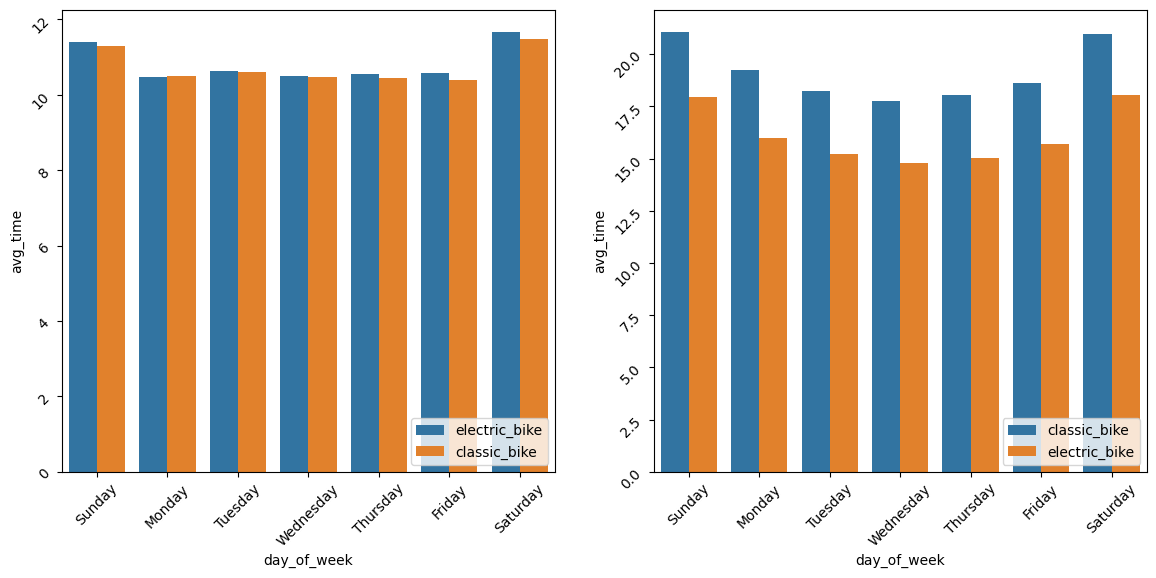

In [15]:
query = f"""
    SELECT 
        member_casual,
        rideable_type,
        day_of_week, 
        AVG(ride_time) as avg_time
        FROM {cleaned_table_ref}
    GROUP BY member_casual, rideable_type, day_of_week
"""

df = client.query(query).to_dataframe()

custom_dict = {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6} 
df = df.sort_values(by='day_of_week', key=lambda x: x.map(custom_dict))

member_df = df[df['member_casual'] == 'member']
casual_df = df[df['member_casual'] == 'casual']

fig, ax = plt.subplots(1,2, figsize=(14, 6))

sns.barplot(data=member_df, x='day_of_week', y='avg_time', hue='rideable_type', ax=ax[0])
sns.barplot(data=casual_df, x='day_of_week', y='avg_time', hue='rideable_type', ax=ax[1])

ax[0].tick_params(labelrotation=45)
ax[0].legend(loc='lower right')

ax[1].tick_params(labelrotation=45)
ax[1].legend(loc='lower right')

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


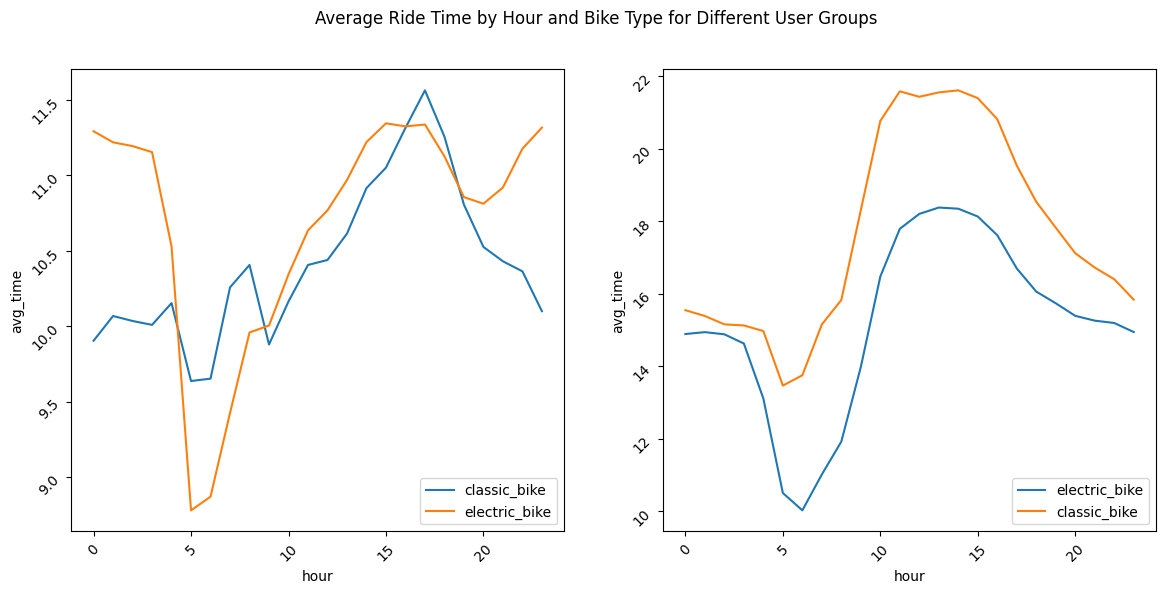

In [13]:
query = f"""
    SELECT 
        member_casual,
        rideable_type,
        EXTRACT(HOUR FROM started_at) as hour, 
        AVG(ride_time) as avg_time
        FROM {cleaned_table_ref}
    GROUP BY member_casual, rideable_type, hour
"""

df = client.query(query).to_dataframe()
df = df.sort_values(by='hour')

member_df = df[df['member_casual'] == 'member']
casual_df = df[df['member_casual'] == 'casual']

fig, ax = plt.subplots(1,2, figsize=(14, 6))

sns.lineplot(data=member_df, x='hour', y='avg_time', hue='rideable_type', ax=ax[0])
sns.lineplot(data=casual_df, x='hour', y='avg_time', hue='rideable_type', ax=ax[1])

ax[0].tick_params(labelrotation=45)
ax[0].legend(loc='lower right')

ax[1].tick_params(labelrotation=45)
ax[1].legend(loc='lower right')

plt.suptitle('Average Ride Time by Hour and Bike Type for Different User Groups')
plt.show()

In [64]:
query = f"""
    SELECT start_station_name, AVG(ride_time) as avg_ride
    FROM {cleaned_table_ref}
    WHERE member_casual = 'member' AND rideable_type = 'classic_bike'
    GROUP BY start_station_name
    ORDER BY COUNT(*) DESC
    LIMIT 30
"""

df = client.query(query).to_dataframe()
df.describe().T

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
avg_ride,30.0,10.15359,1.826929,6.749079,8.95196,9.840749,11.056347,16.022707


In [65]:
query = f"""
    SELECT start_station_name, AVG(ride_time) as avg_ride
    FROM {cleaned_table_ref}
    WHERE member_casual = 'member' AND rideable_type = 'electric_bike'
    GROUP BY start_station_name
    ORDER BY COUNT(*) DESC
    LIMIT 30
"""

df = client.query(query).to_dataframe()
df.describe().T

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
avg_ride,30.0,10.18919,0.935718,8.602719,9.460114,10.175118,10.665352,12.348579


In [66]:
query = f"""
    SELECT start_station_name, AVG(ride_time) as avg_ride
    FROM {cleaned_table_ref}
    WHERE member_casual = 'casual' AND rideable_type = 'classic_bike'
    GROUP BY start_station_name
    ORDER BY COUNT(*) DESC
    LIMIT 30
"""

df = client.query(query).to_dataframe()
df.describe().T

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
avg_ride,30.0,25.201538,5.790258,15.86233,20.678327,23.946339,28.727772,37.169646


In [67]:
query = f"""
    SELECT start_station_name, AVG(ride_time) as avg_ride
    FROM {cleaned_table_ref}
    WHERE member_casual = 'casual' AND rideable_type = 'electric_bike'
    GROUP BY start_station_name
    ORDER BY COUNT(*) DESC
    LIMIT 30
"""

df = client.query(query).to_dataframe()
df.describe().T

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
avg_ride,30.0,21.156136,7.073381,12.638243,15.888681,17.58485,27.241334,35.524039


In [13]:
query = f"""
    SELECT 
        CASE WHEN start_station_name = end_station_name THEN 'round' ELSE 'one-way' END AS trip_type,
        AVG(ride_time) as avg_time,
        COUNT(*) as cnt
    FROM {cleaned_table_ref}
    GROUP BY trip_type
"""

df = client.query(query).to_dataframe()
df

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,trip_type,avg_time,cnt
0,one-way,11.724088,56357076
1,round,22.614918,1084249


In [5]:
query = f"""
    WITH ranked AS (
        SELECT *, ROW_NUMBER() OVER (PARTITION BY member_casual, rideable_type ORDER BY ride_id) AS rn
        FROM {cleaned_table_ref}
    )

    SELECT * 
    FROM ranked
    WHERE rn <= 5000
"""

df = client.query(query).to_dataframe()

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
formula = 'ride_time ~ C(member_casual) + C(rideable_type) + C(member_casual):C(rideable_type)'
model = ols(formula, df).fit()
results = sm.stats.anova_lm(model, type=2)
results

,df,sum_sq,mean_sq,F,PR(>F)
C(member_casual),1.0,2.660924e+05,266092.42005,1594.752542,0.000000e+00
C(rideable_type),1.0,8.490348e+03,8490.34805,50.884592,1.013046e-12
C(member_casual):C(rideable_type),1.0,1.273448e+04,12734.48405,76.320666,2.598074e-18
Residual,19996.0,3.336432e+06,166.85499,NaN,NaN


In [ ]:
query = f"""
    WITH ranked AS (
        SELECT *, ROW_NUMBER() OVER (PARTITION BY day_of_week ORDER BY ride_id) AS rn
        FROM {cleaned_table_ref}
    )

    SELECT * 
    FROM ranked
    WHERE rn <= 15000
"""

df = client.query(query).to_dataframe()

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [ ]:
day_groups = [group['ride_time'].values for _, group in df.groupby('day_of_week')]

f_stat, p_val = f_oneway(*day_groups)

print("F =", f_stat, ", p =", p_val)

Member users: F = 100.66783836554634 , p = 7.486481436879072e-127


In [77]:
query = f"""
    WITH ranked AS (
        SELECT *, 
            ROW_NUMBER() OVER (PARTITION BY EXTRACT(HOUR FROM started_at) ORDER BY RAND()) as rn,
            EXTRACT(HOUR FROM started_at) AS hour
        FROM {cleaned_table_ref}
    )

    SELECT *
    FROM ranked
    WHERE rn <= 500
"""

df = client.query(query).to_dataframe()

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [78]:
day_groups = [group['ride_time'].values for _, group in df.groupby('hour')]

f_stat, p_val = f_oneway(*day_groups)

print("F =", f_stat, ", p =", p_val)

F = 4.695992477183007 , p = 6.629793025812667e-13


In [79]:
query = f"""
    WITH top_30_stations AS (
        SELECT start_station_name
        FROM {cleaned_table_ref}
        GROUP BY start_station_name
        ORDER BY COUNT(*) DESC
        LIMIT 30
    ),

    ranked AS (
        SELECT *,
            ROW_NUMBER() OVER (PARTITION BY c.start_station_name ORDER BY RAND()) as rn
        FROM {cleaned_table_ref} c
        WHERE c.start_station_name IN (SELECT start_station_name FROM top_30_stations)
    )

    SELECT * 
    FROM ranked
    WHERE rn <= 500
"""

df = client.query(query).to_dataframe()

/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [82]:
day_groups = [group['ride_time'].values for _, group in df.groupby('start_station_name')]

f_stat, p_val = f_oneway(*day_groups)

print("F =", f_stat, ", p =", p_val)

F = 59.43272973021563 , p = 0.0


/home/olshe/pers/eu-climate-economic-resilience/.venv/lib/python3.12/site-packages/google/cloud/bigquery/table.py:1957: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


RMSE: 139.59 seconds
R² Score: 0.03
